# 🎬 Netflix Data Analyst Project

### 🧩 Import Libraries

In [201]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [202]:
# Display Setting
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

### 🧮 Step 1: Load and Explore Data

In [203]:
df=pd.read_csv("netflix.csv")
print("Data Loaded Successfully!")
print("\nShape of DataSet:",df.shape)
print("\nData Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())


Data Loaded Successfully!

Shape of DataSet: (8807, 12)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

First 5 Rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Wate

### 🧹 Step 2: Data Cleaning

In [204]:
# Check missing values....
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [205]:
# Convert Date_added to DateTime
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [206]:
# Remove duplicates.....
df.drop_duplicates(inplace=True)

In [207]:
# Clean text fields
df['listed_in'] = df['listed_in'].str.lower().str.strip()
df['title'] = df['title'].str.strip()

In [208]:
# Check results after cleaning
print("\nAfter Cleaning:")
print(df.info())


After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB
None


### 🔍 Step 3: Basic Analysis

In [209]:
print('Type Counts:')
print(df['type'].value_counts().head(10))

Type Counts:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [210]:
print("Top 10 Countries")
print(df['country'].value_counts().head(10))

Top 10 Countries
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [211]:
print("Top 10 Ratings:")
print(df['rating'].value_counts().head(10))

Top 10 Ratings:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


### 📊 Step 4: Visual Exploratory Data Analysis (EDA)


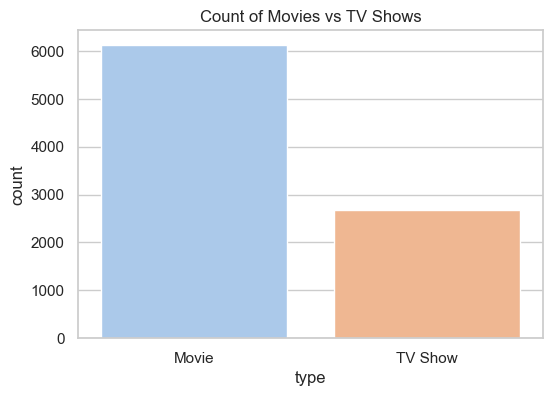

In [212]:
# Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, hue='type', palette='pastel', legend=False)
plt.title('Count of Movies vs TV Shows')
plt.show()

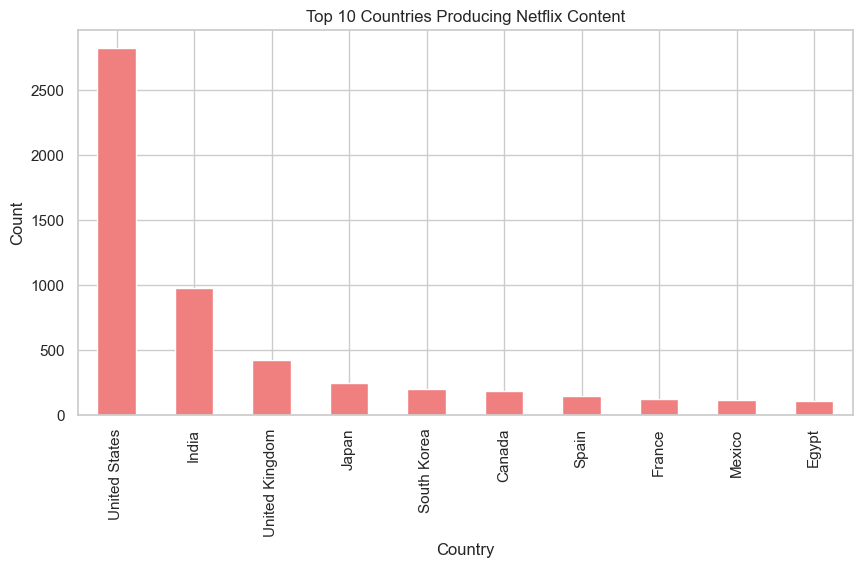

In [213]:
# Top 10 Producing Countries
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

### Questions 1
What is the ratio of Movies vs TV Shows on Netflix?
Helps understand content investment priorities.

In [214]:
type_counts = df['type'].value_counts()
print(type_counts)
movies=type_counts['Movie']
tvShows=type_counts['TV Show']
ratio= movies/tvShows
print("Ratio (Movies : TV Shows) = {:.2f} : 1".format(ratio))

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
Ratio (Movies : TV Shows) = 2.29 : 1


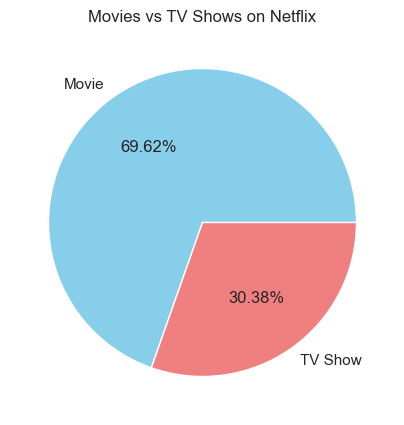

In [215]:
plt.figure(figsize=(5,5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%', colors=['skyblue','lightcoral'])
plt.title('Movies vs TV Shows on Netflix')
plt.show()


**Finding:** Movies = 6131, TV Shows = 2676 → 2.29 : 1 ratio.
**Insight:** Netflix focuses more on movies, but increasing series could boost long-term engagement.

### Questions 2
Which genres are most popular on Netflix globally?
Aids in deciding what genre of content to acquire more.


In [216]:

# Drop missing values, split genre strings by comma, and flatten
genre_list = df['listed_in'].dropna().str.split(',').sum()

# Clean and count each genre
genre_counts = Counter([g.strip().title() for g in genre_list])

# Convert to Pandas Series for easy handling
genre_series = pd.Series(genre_counts).sort_values(ascending=False)
print(genre_series.head(10))


International Movies        2752
Dramas                      2427
Comedies                    1674
International Tv Shows      1351
Documentaries                869
Action & Adventure           859
Tv Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
dtype: int64


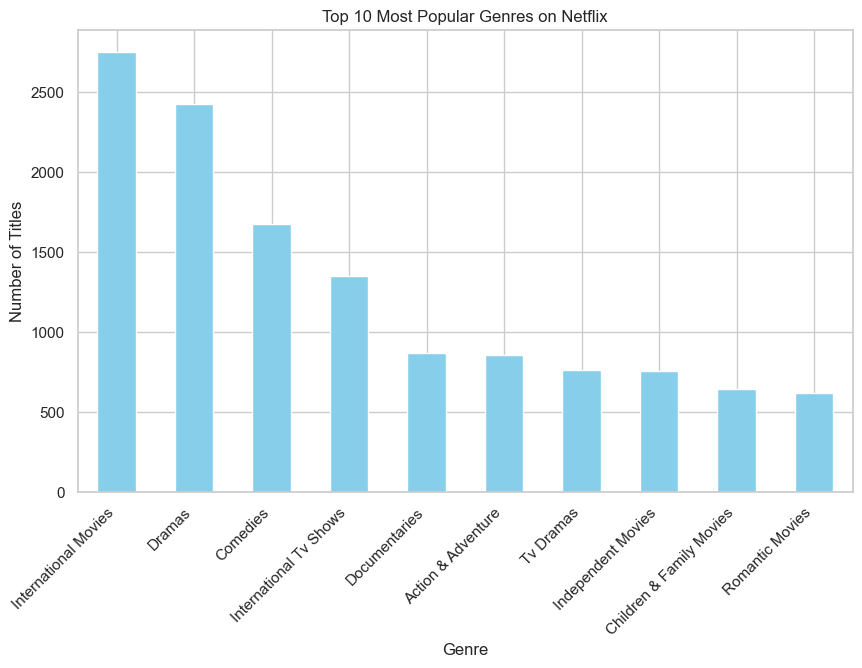

In [217]:
plt.figure(figsize=(10,6))
genre_series.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


**Finding:** Top = International Movies, Dramas, Comedies
**Insight:** Global and emotional storytelling dominate — Netflix’s strength lies in international and drama genres.

### Questions 3
Which years saw the highest release of content on Netflix?
Shows how aggressively Netflix was adding new content in those years.


In [218]:
content_per_year = df['release_year'].value_counts().sort_index(ascending=True)
print(content_per_year.tail(10))


release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64


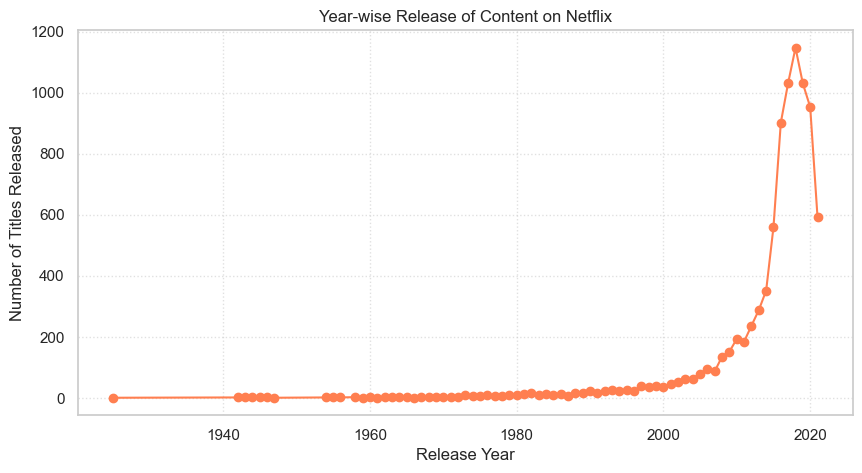

In [219]:
plt.figure(figsize=(10,5))
plt.plot(content_per_year.index, content_per_year.values, marker='o', color='coral')
plt.title('Year-wise Release of Content on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.grid(True, linestyle='dotted', alpha=0.6)
plt.show()


In [220]:
peak_year = content_per_year.idxmax()
peak_count = content_per_year.max()
print(f" Peak Year: {peak_year} — {peak_count} titles released!")

 Peak Year: 2018 — 1147 titles released!


**Finding:** Peak = 2018 (1147 titles)
**Insight:** 2018 marked Netflix’s aggressive expansion; post-2019 shows quality-over-quantity strategy

### Question 4
Which countries produce the most Netflix content?
Useful for identifying key content-producing markets.


In [221]:
df_countries = df.assign(country=df['country'].str.split(', '))
df_countries = df_countries.explode('country')
country_counts = df_countries['country'].value_counts().head(10)
# print(country_counts)

# country_counts = (
#     df.assign(country=df['country'].str.split(', '))
#       .explode('country')['country']
#       .value_counts()
#       .drop('Unknown', errors='ignore')
#       .head(10)
# )
print(country_counts)


country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


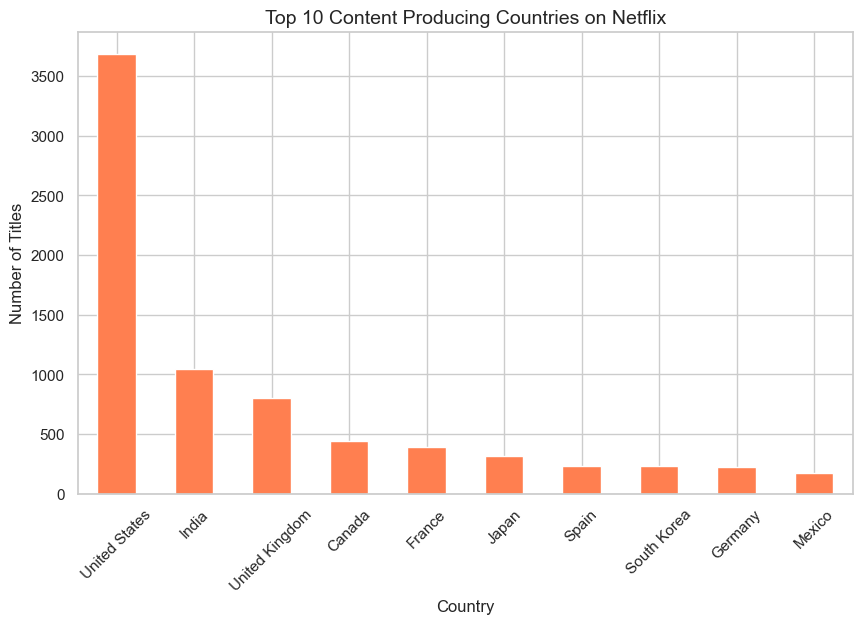

In [222]:

plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='coral')
plt.title("Top 10 Content Producing Countries on Netflix", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


**Finding:** 🇺🇸 US 3689 titles, 🇮🇳 India 1046, 🇬🇧 UK 804
**Insight:** The US leads, but India is Netflix’s biggest international hub — strong growth potential in Asia.

### Question 5
How has the trend of adding new content evolved year by year?
Can guide content budgeting for upcoming years.


In [223]:
content_trend= df['release_year'].value_counts().sort_index()
print(content_trend)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


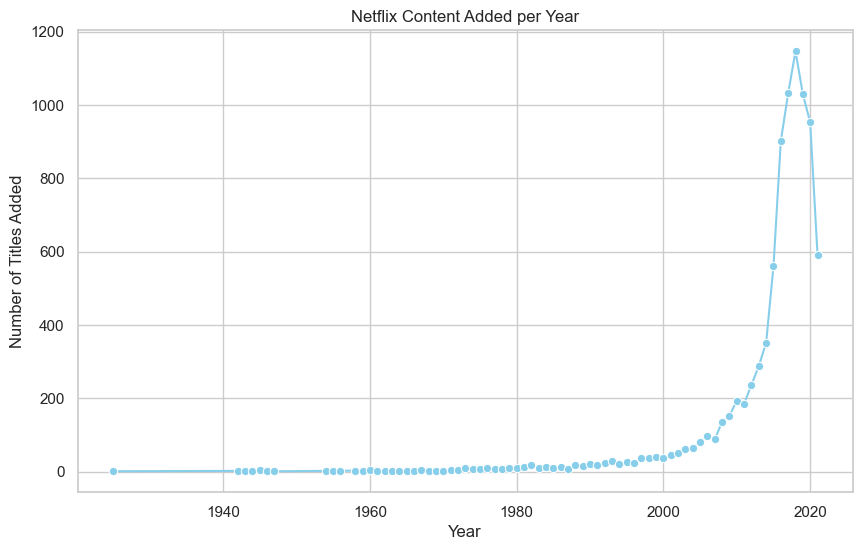

In [224]:

plt.figure(figsize=(10,6))
sns.lineplot(x=content_trend.index, y=content_trend.values, marker='o', color='skyblue')
plt.title('Netflix Content Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


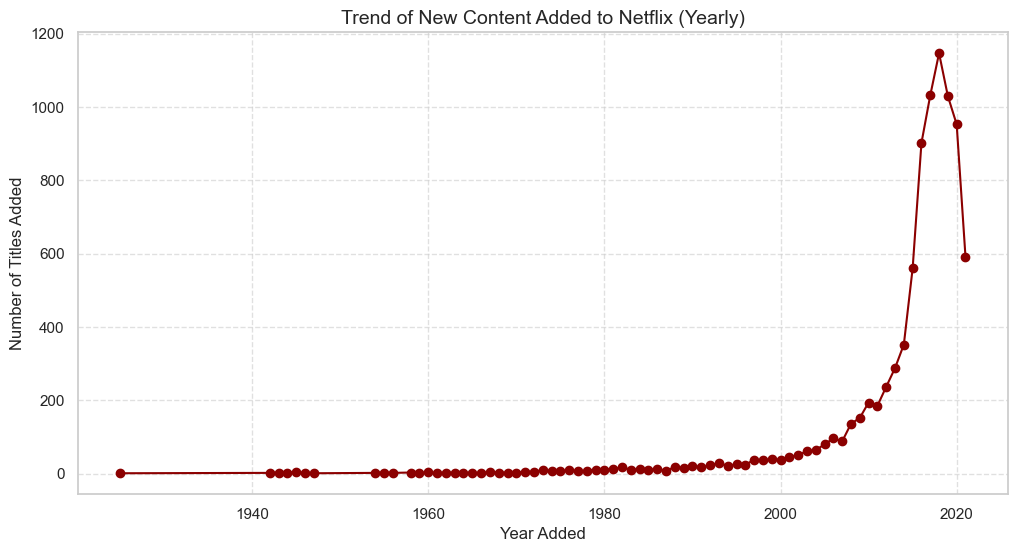

In [225]:
plt.figure(figsize=(12,6))
plt.plot(content_trend.index, content_trend.values, marker='o', color='darkred')
plt.title("Trend of New Content Added to Netflix (Yearly)", fontsize=14)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<Axes: xlabel='release_year'>

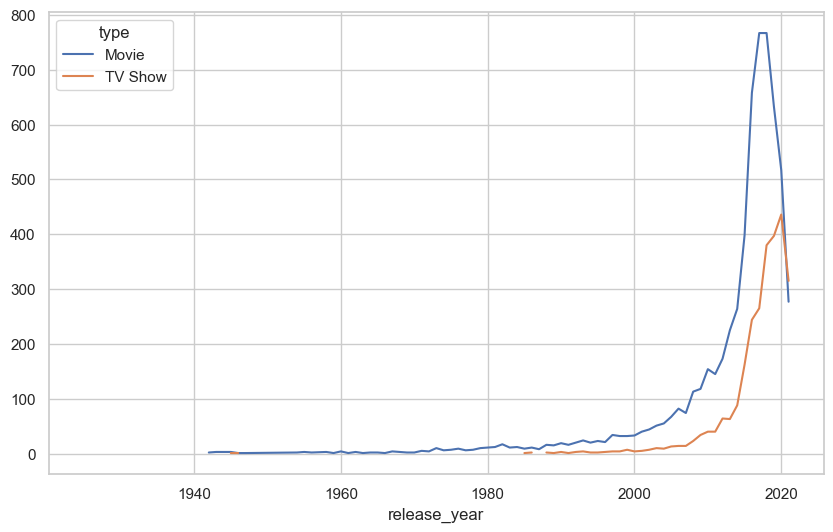

In [226]:
df.groupby(['release_year', 'type']).size().unstack().plot(kind='line', figsize=(10,6))


**Finding:** Rapid rise until 2018, slight decline after 2020
**Insight:** Netflix stabilized production; focusing on originals rather than bulk licensing.

### Questions 6:
Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Netflix?
Assists in aligning with target audience age groups.


In [227]:
rating_counts= df['rating'].value_counts()
print(rating_counts.head(10))

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


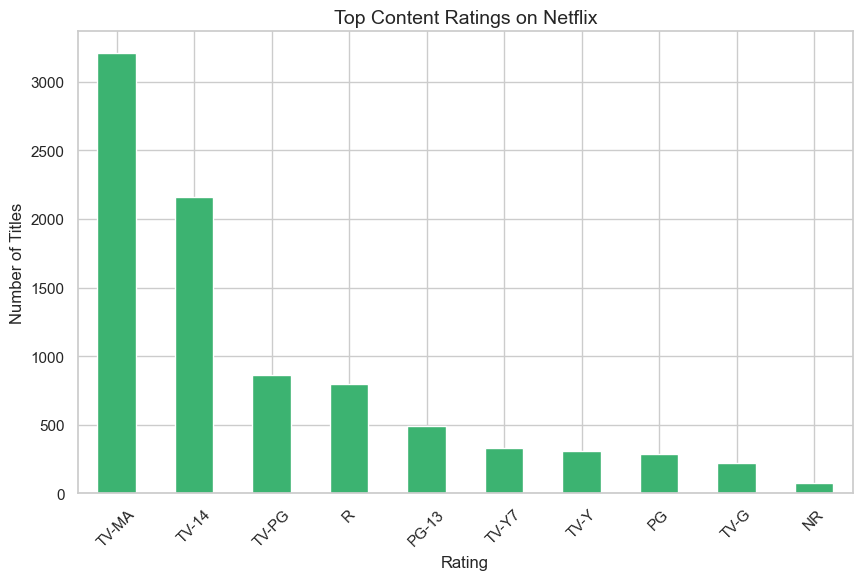

In [228]:
plt.figure(figsize=(10,6))
rating_counts.head(10).plot(kind='bar', color='mediumseagreen')
plt.title("Top Content Ratings on Netflix", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


**Finding:** TV-MA (3207), TV-14 (2160) dominate
**Insight:** Mature/adult-oriented content forms the majority — aligns with Netflix’s adult audience focus.

### Question 7:
Do some countries tend to produce more mature content (TV-MA)?
Useful for market segmentation and localization strategies.


In [229]:
# Split, explode, and clean the 'country' column once
df_countries = (
    df.assign(country=df['country'].str.split(', '))
      .explode('country')
)

# Clean extra spaces and remove Unknown entries
df_countries['country'] = df_countries['country'].str.strip()
df_countries = df_countries[df_countries['country'] != 'Unknown']

# Top 10 countries by mature (TV-MA) content
mature_counts = (
    df_countries.loc[df_countries['rating'] == 'TV-MA', 'country']
    .value_counts()
    .head(10)
)

# Top 10 countries overall
country_counts = (
    df_countries['country']
    .value_counts()
    .head(10)
)

# Display
print("Top 10 Countries (TV-MA Content):\n", mature_counts)
print("\nTop 10 Countries (Overall Content):\n", country_counts)


Top 10 Countries (TV-MA Content):
 country
United States     1100
India              266
United Kingdom     251
Spain              170
France             163
Canada             107
Mexico             102
Japan              101
South Korea         92
Germany             79
Name: count, dtype: int64

Top 10 Countries (Overall Content):
 country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


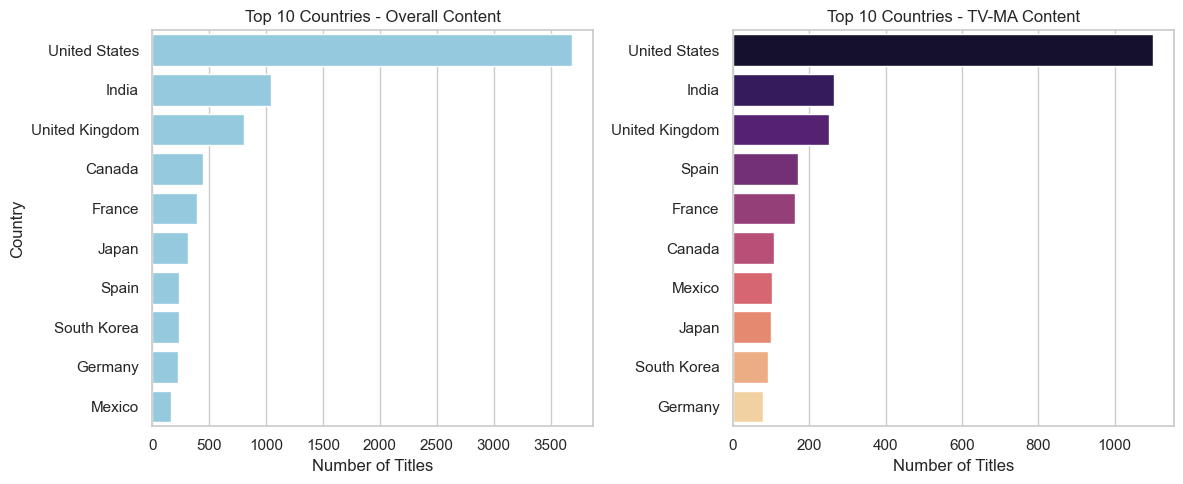

In [230]:

plt.figure(figsize=(12,5))  # width=12, height=5

# Chart 1 — Overall content
plt.subplot(1, 2, 1)  # (rows=1, cols=2, plot_position=1)
sns.barplot(x=country_counts.values, y=country_counts.index, color='skyblue')
plt.title('Top 10 Countries - Overall Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

# Chart 2 — Mature content
plt.subplot(1, 2, 2)  # second plot
# sns.barplot(x=mature_counts.values, y=mature_counts.index, color='salmon')
sns.barplot(x=mature_counts.values, y=mature_counts.index,hue=mature_counts.index, palette='magma')
plt.title('Top 10 Countries - TV-MA Content')
plt.xlabel('Number of Titles')
plt.ylabel('')

plt.tight_layout()  # adjust spacing
plt.show()



**Finding:** 🇺🇸 US 1100 titles, 🇮🇳 India 266, 🇬🇧 UK 251
**Insight:** Western markets drive mature content; India emerging fast — localized age-rating strategies needed.

### Question 8:
Which genres are more associated with TV Shows vs Movies?
Helps in differentiating marketing for long-form vs short-form content.


In [231]:
df['genre'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()
genre_type_counts = df_exploded.groupby(['type', 'genre']).size().unstack(fill_value=0)
# print(genre_type_counts.head())
top_movies_genres = genre_type_counts.loc['Movie'].sort_values(ascending=False).head(10)
top_tv_genres = genre_type_counts.loc['TV Show'].sort_values(ascending=False).head(10)

print("Top 10 Movie Genres:\n", top_movies_genres)
print("\nTop 10 TV Show Genres:\n", top_tv_genres)


Top 10 Movie Genres:
 genre
international movies        2752
dramas                      2427
comedies                    1674
documentaries                869
action & adventure           859
independent movies           756
children & family movies     641
romantic movies              616
thrillers                    577
music & musicals             375
Name: Movie, dtype: int64

Top 10 TV Show Genres:
 genre
international tv shows    1351
tv dramas                  763
tv comedies                581
crime tv shows             470
kids' tv                   451
docuseries                 395
romantic tv shows          370
reality tv                 255
british tv shows           253
anime series               176
Name: TV Show, dtype: int64


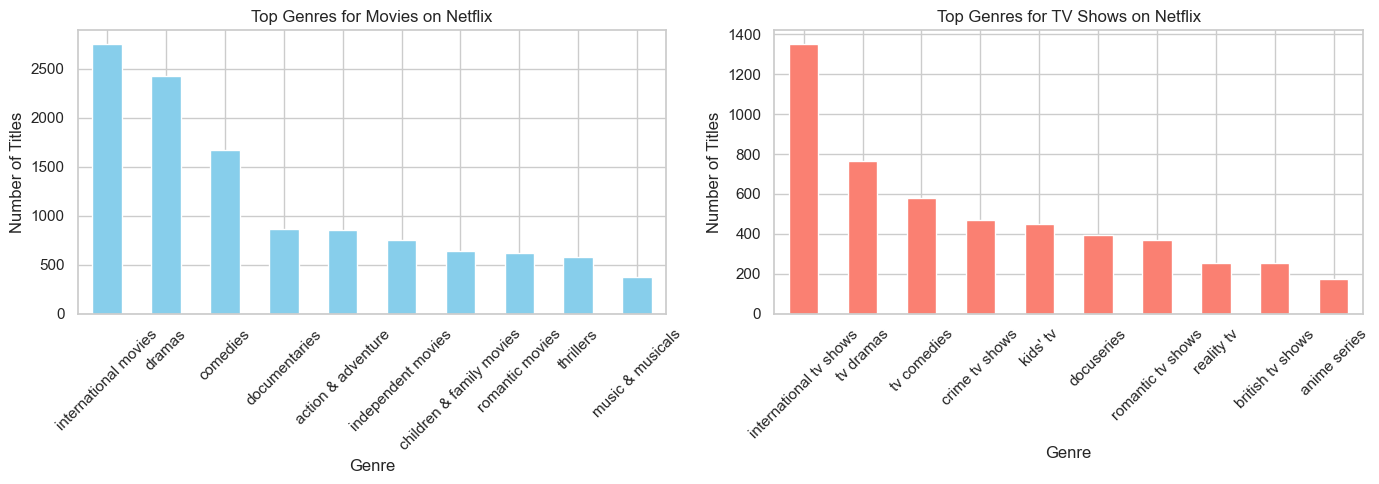

In [232]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot 1: Top movie genres
top_movies_genres.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title("Top Genres for Movies on Netflix")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Number of Titles")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Top TV show genres
top_tv_genres.plot(kind='bar', color='salmon', ax=axes[1])
axes[1].set_title("Top Genres for TV Shows on Netflix")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Number of Titles")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for neat display
plt.tight_layout()
plt.show()


**Finding:** Movies: International Movies, Dramas, Comedies
**TV Shows:** International TV Shows, TV Dramas, Crime TV
**Insight:** Long-form storytelling suits dramas and crime; one-time formats dominate movies.

### Question 9:
Which genres dominate the U.S. vs other countries?
Supports geo-targeted recommendations and promotions.


In [233]:
# Ensure 'country' column is treated as a string and handle NaN
df['country'] = df['country'].fillna('').astype(str)

# Split genres properly
df['genre'] = df['listed_in'].str.split(', ')

# Explode genres into separate rows
df_exploded = df.explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()

# Categorize countries into U.S. and Others safely
df_exploded['region'] = df_exploded['country'].apply(
    lambda x: 'U.S.' if 'United States' in x else 'Other'
)

# Count how many times each genre appears per region
genre_region_counts = df_exploded.groupby(['region', 'genre']).size().unstack(fill_value=0)

# Top 10 genres in the U.S. and other regions
top_us_genres = genre_region_counts.loc['U.S.'].sort_values(ascending=False).head(10)
top_other_genres = genre_region_counts.loc['Other'].sort_values(ascending=False).head(10)

print(" Top U.S. Genres:\n", top_us_genres)
print("\n Top Other Regions Genres:\n", top_other_genres)


 Top U.S. Genres:
 genre
dramas                      835
comedies                    680
documentaries               512
action & adventure          404
children & family movies    390
independent movies          390
thrillers                   292
tv comedies                 258
tv dramas                   232
romantic movies             225
Name: U.S., dtype: int64

 Top Other Regions Genres:
 genre
international movies      2586
dramas                    1592
international tv shows    1277
comedies                   994
tv dramas                  531
action & adventure         455
romantic movies            391
independent movies         366
documentaries              357
romantic tv shows          326
Name: Other, dtype: int64


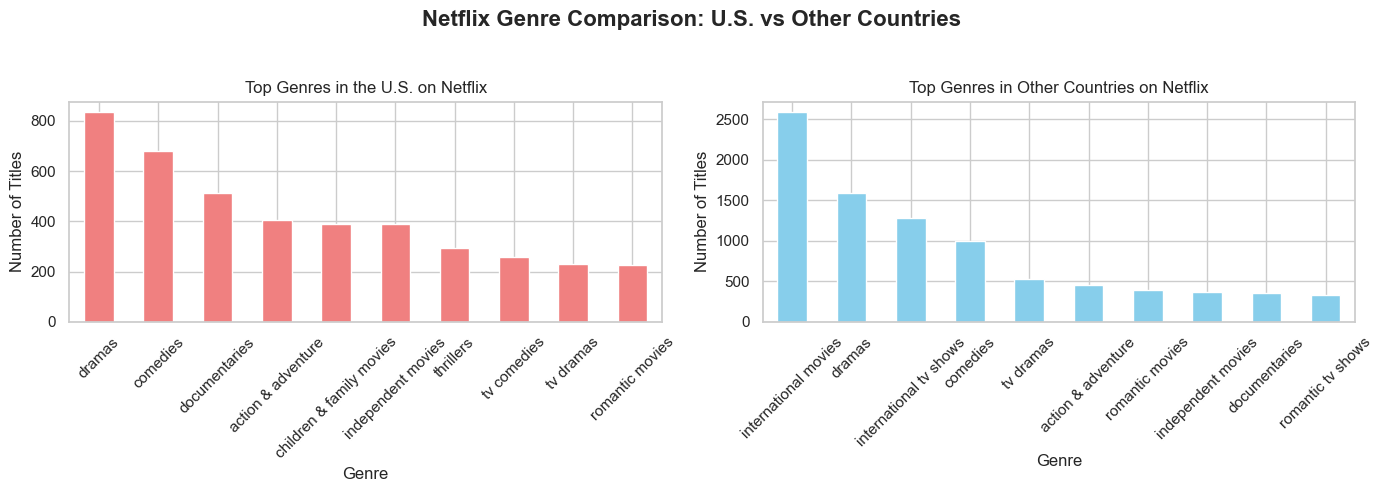

In [234]:

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot 1: U.S. Genres
top_us_genres.plot(kind='bar', color='lightcoral', ax=axes[0])
axes[0].set_title("Top Genres in the U.S. on Netflix")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Number of Titles")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Other Countries Genres
top_other_genres.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title("Top Genres in Other Countries on Netflix")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Number of Titles")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Optional: add a main title
fig.suptitle("Netflix Genre Comparison: U.S. vs Other Countries", fontsize=16, fontweight='bold')

# Adjust spacing for the main title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the figure
plt.show()


**Finding:** International Movies & TV Shows lead recent years
**Insight:** Globalization trend continues — Netflix invests heavily in multi-language content.

### Question 10:
What genres are most popular in the last 3 years?
Informs current trends and consumer preferences



In [235]:
# Ensure year is integer
df['release_year'] = df['release_year'].astype(int)

# Find latest year
max_year = df['release_year'].max()
print("Latest release year in dataset:", max_year)

# Filter last 3 years (make a copy to avoid warning)
recent_years = df[df['release_year'] >= (max_year - 2)].copy()

# Handle missing values
recent_years['listed_in'] = recent_years['listed_in'].fillna('')

# Split and explode genres
recent_years['genre'] = recent_years['listed_in'].str.split(', ')
recent_genres = recent_years.explode('genre')
recent_genres['genre'] = recent_genres['genre'].str.strip()

# Count top 10 genres
top_recent_genres = recent_genres['genre'].value_counts().head(10)

print("Top 10 Trending Genres in the Last 3 Years:")
print(top_recent_genres)


Latest release year in dataset: 2021
Top 10 Trending Genres in the Last 3 Years:
genre
international movies        662
international tv shows      564
dramas                      530
comedies                    362
tv dramas                   343
tv comedies                 252
documentaries               234
crime tv shows              226
children & family movies    205
docuseries                  178
Name: count, dtype: int64


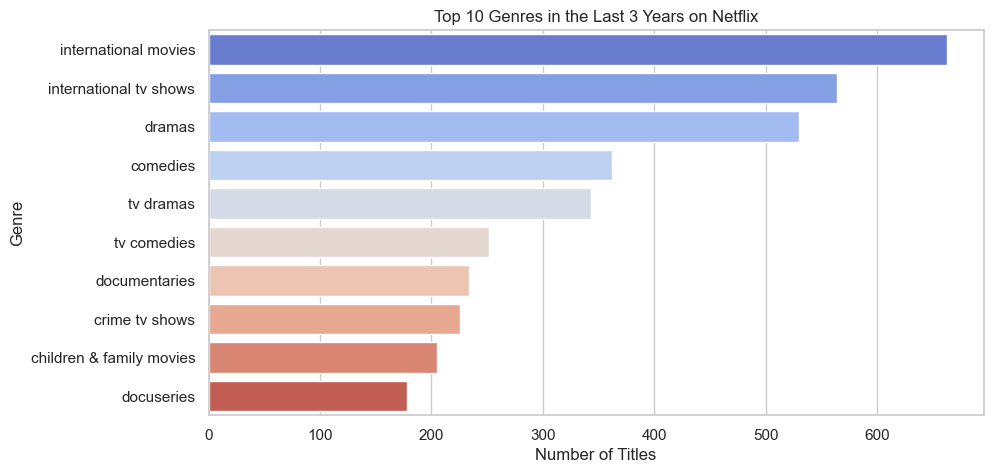

In [236]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=top_recent_genres.values,
    y=top_recent_genres.index,
    hue=top_recent_genres.index,  # assign hue to same variable
    palette="coolwarm",
    legend=False                  # hide redundant legend
)
plt.title("Top 10 Genres in the Last 3 Years on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


**Finding:** International Movies & TV Shows lead recent years
**Insight:** Globalization trend continues — Netflix invests heavily in multi-language content.

### Question: 11
 Who are the top 10 directors with the most Netflix content?
            Guides partnership strategy with content creators.

 Top 10 Directors with Most Netflix Content:
              Director  Count
0        Rajiv Chilaka     22
1            Jan Suter     21
2          Raúl Campos     19
3         Marcus Raboy     16
4          Suhas Kadav     16
5            Jay Karas     15
6  Cathy Garcia-Molina     13
7      Youssef Chahine     12
8      Martin Scorsese     12
9          Jay Chapman     12


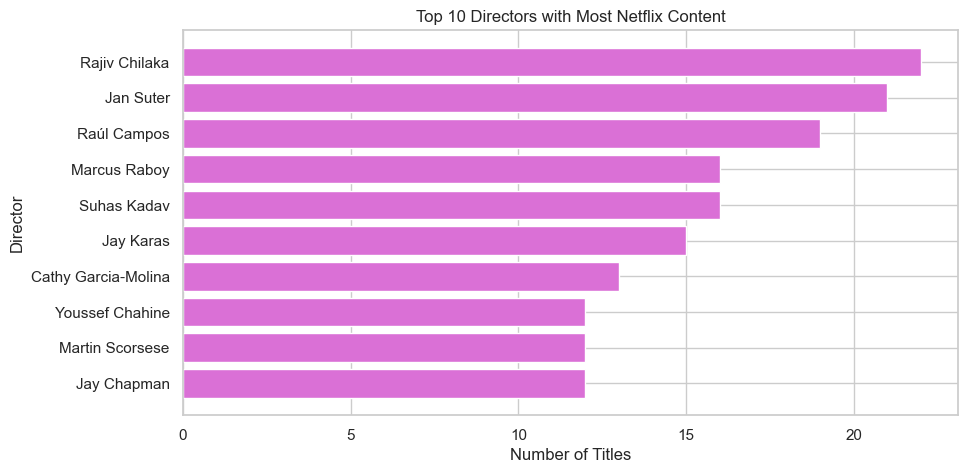

In [237]:
df = df.dropna(subset=['director'])
directors = df['director'].str.split(',', expand=True).stack().str.strip()
director_counts = directors.value_counts().reset_index()
director_counts.columns = ['Director', 'Count']
top_10_directors = director_counts.head(10)
print(" Top 10 Directors with Most Netflix Content:")
print(top_10_directors)

plt.figure(figsize=(10,5))
plt.barh(top_10_directors['Director'], top_10_directors['Count'], color='orchid')
plt.title('Top 10 Directors with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().invert_yaxis()  
plt.show()


**Finding:** Rajiv Chilaka (22), Jan Suter (21), Raúl Campos (19)
**Insight:** Children’s and comedy directors dominate — ideal collaborators for future family and stand-up content.

### Question: 12
Which actors appear most frequently in Netflix shows?
Insight into popular talent that may boost viewer retention.


In [238]:
# Handle missing values in the 'cast' column
df['cast'] = df['cast'].fillna('')

# Split multiple actors in each row
df['actor'] = df['cast'].str.split(', ')

# Explode to create one row per actor
df_actors = df.explode('actor')

# Clean extra spaces
df_actors['actor'] = df_actors['actor'].str.strip()

# Remove empty actor names
df_actors = df_actors[df_actors['actor'] != '']

# Count actor appearances
top_actors = df_actors['actor'].value_counts().head(10)

print(" Top 10 Most Frequent Actors on Netflix:")
print(top_actors)


 Top 10 Most Frequent Actors on Netflix:
actor
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Paresh Rawal        28
Amitabh Bachchan    28
Julie Tejwani       28
Boman Irani         27
Rupa Bhimani        27
Name: count, dtype: int64


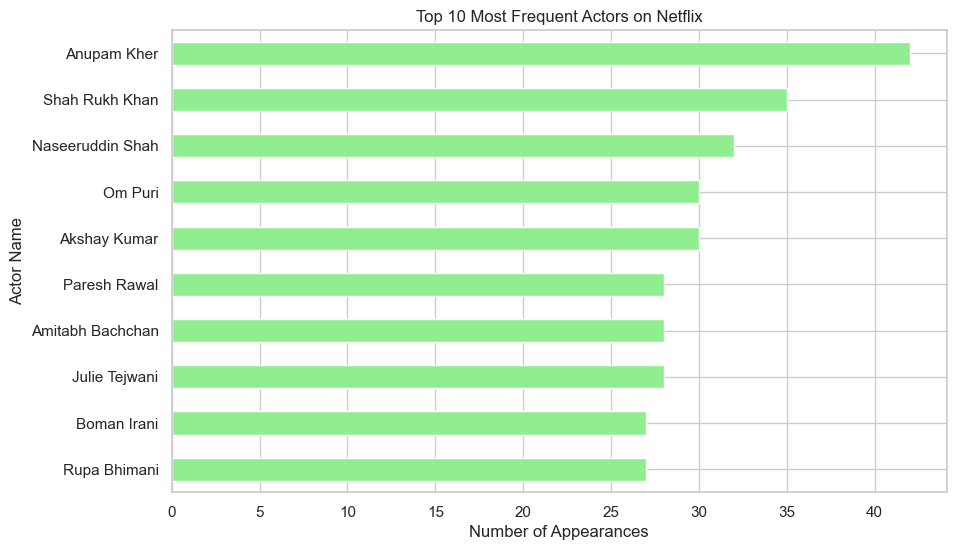

In [239]:
top_actors.plot(kind='barh', figsize=(10,6), color='lightgreen')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor Name')
plt.gca().invert_yaxis()
plt.show()


**Finding:** Anupam Kher (42), Shah Rukh Khan (35), Naseeruddin Shah (32)
**Insight:** Indian stars appear most often, reflecting strong Bollywood presence on Netflix.

### Question: 13
Which director-genre pairs are most frequent?
Helps understand creative trends and successful pairings.



In [240]:
# Handle missing values
df['director'] = df['director'].fillna('')
df['listed_in'] = df['listed_in'].fillna('')

# Split multiple directors and genres
df['director'] = df['director'].str.split(', ')
df['genre'] = df['listed_in'].str.split(', ')

# Explode both columns
df_exploded = df.explode('director').explode('genre')

# Clean extra spaces
df_exploded['director'] = df_exploded['director'].str.strip()
df_exploded['genre'] = df_exploded['genre'].str.strip()

# Remove empty values
df_exploded = df_exploded[(df_exploded['director'] != '') & (df_exploded['genre'] != '')]

# Group by director and genre, count occurrences
director_genre_counts = (
    df_exploded.groupby(['director', 'genre'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Get top 10 director-genre pairs
top_director_genre = director_genre_counts.head(10)

print(" Top 10 Director–Genre Pairs on Netflix:")
print(top_director_genre)



 Top 10 Director–Genre Pairs on Netflix:
                  director                     genre  count
8969         Rajiv Chilaka  children & family movies     22
4553             Jan Suter           stand-up comedy     21
9107           Raúl Campos           stand-up comedy     19
10736          Suhas Kadav  children & family movies     16
6817          Marcus Raboy           stand-up comedy     15
4675             Jay Karas           stand-up comedy     14
1839   Cathy Garcia-Molina      international movies     13
4666           Jay Chapman           stand-up comedy     12
11949      Youssef Chahine                    dramas     12
11951      Youssef Chahine      international movies     10


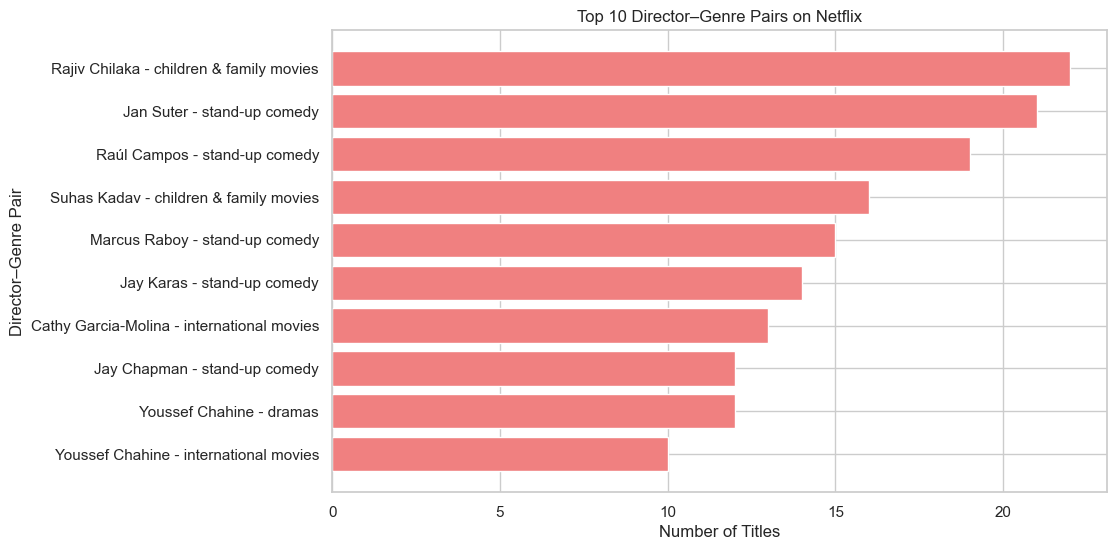

In [241]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(
    top_director_genre['director'] + ' - ' + top_director_genre['genre'],
    top_director_genre['count'],
    color='lightcoral'
)
plt.title('Top 10 Director–Genre Pairs on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director–Genre Pair')
plt.gca().invert_yaxis()
plt.show()


**Finding:** Rajiv Chilaka – Children & Family Movies, Jan Suter – Stand-up Comedy
**Insight:** Directors show clear specialization — can be used for targeted collaborations and marketing.

### Question: 14
How many titles have unknown directors or cast members?
Can identify data gaps or marketing focus needs

In [242]:
# Check total records
total_titles = len(df)

# Handle missing or blank values for director and cast
unknown_director = df['director'].isna() | (df['director'].str.strip() == '')
unknown_cast = df['cast'].isna() | (df['cast'].str.strip() == '')

# Count unknowns
unknown_director_count = unknown_director.sum()
unknown_cast_count = unknown_cast.sum()

# Calculate percentages
director_pct = (unknown_director_count / total_titles) * 100
cast_pct = (unknown_cast_count / total_titles) * 100

print(" Missing Metadata Report:")
print(f"Total Titles: {total_titles}")
print(f"Titles with Unknown Director: {unknown_director_count} ({director_pct:.2f}%)")
print(f"Titles with Unknown Cast: {unknown_cast_count} ({cast_pct:.2f}%)")


 Missing Metadata Report:
Total Titles: 6173
Titles with Unknown Director: 0 (0.00%)
Titles with Unknown Cast: 473 (7.66%)


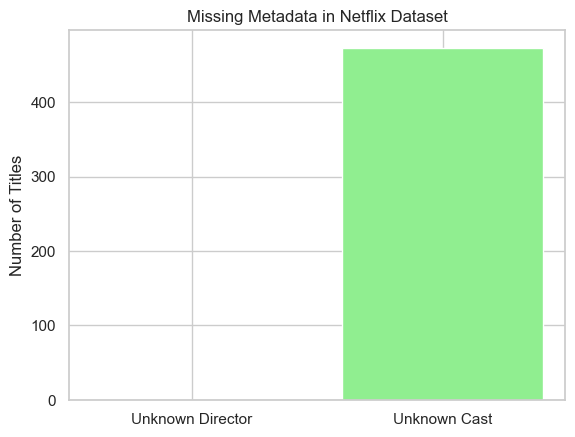

In [243]:
# import matplotlib.pyplot as plt

labels = ['Unknown Director', 'Unknown Cast']
values = [unknown_director_count, unknown_cast_count]

plt.bar(labels, values, color=['lightblue', 'lightgreen'])
plt.title('Missing Metadata in Netflix Dataset')
plt.ylabel('Number of Titles')
plt.show()


**Finding:** ~7–8 % titles missing cast info
**Insight:** Metadata improvement is needed — impacts recommendations and search accuracy.

### Question: 15
What is the average duration of Movies on Netflix?
Insight into optimal content length for production/acquisition.



In [244]:

# Filter only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Clean and extract numeric duration
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=False)

# Convert to numeric (ignore errors for invalid entries)
movies_df['duration'] = pd.to_numeric(movies_df['duration'], errors='coerce')

# Calculate average duration
average_duration = movies_df['duration'].mean()

print(f" Average Movie Duration on Netflix: {average_duration:.2f} minutes")


 Average Movie Duration on Netflix: 100.58 minutes


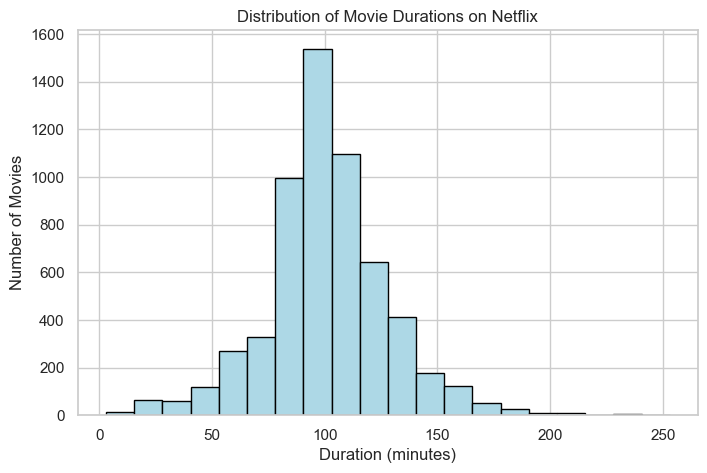

In [245]:

plt.figure(figsize=(8,5))
plt.hist(movies_df['duration'].dropna(), bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


**Finding:** ~7–8 % titles missing cast info
**Insight:** Metadata improvement is needed — impacts recommendations and search accuracy.

### Question: 16

What’s the most common number of seasons for TV shows?
Helps define the typical life cycle of shows on the platform

In [246]:

# Filter for TV Shows
tv_df = df[df['type'] == 'TV Show'].copy()

# Clean and extract the number of seasons
tv_df['duration'] = tv_df['duration'].str.replace(' Season', '', regex=False)
tv_df['duration'] = tv_df['duration'].str.replace('s', '', regex=False)  # remove plural 's'

# Convert to numeric
tv_df['num_seasons'] = pd.to_numeric(tv_df['duration'], errors='coerce')

# Find most common number of seasons
most_common_seasons = tv_df['num_seasons'].mode()[0]
season_counts = tv_df['num_seasons'].value_counts().sort_index()

print(" Frequency of TV Show Seasons:")
print(season_counts)
print(f"\n Most Common Number of Seasons: {most_common_seasons}")


 Frequency of TV Show Seasons:
num_seasons
1     184
2      21
3       4
4       4
5       6
6       3
7       1
8       3
9       3
15      1
Name: count, dtype: int64

 Most Common Number of Seasons: 1


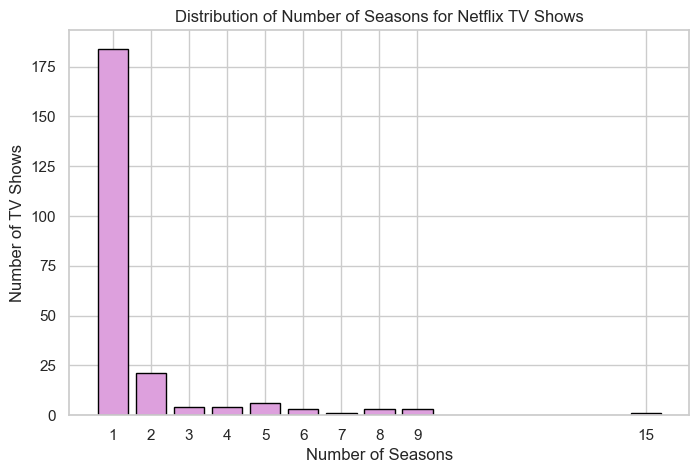

In [247]:

plt.figure(figsize=(8,5))
plt.bar(season_counts.index, season_counts.values, color='plum', edgecolor='black')
plt.title('Distribution of Number of Seasons for Netflix TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(season_counts.index)
plt.show()


**Finding:** 1 season most common
**Insight:** Many shows are mini-series or limited runs — shorter formats favored for experimentation.

### Question: 17
Is there a trend in movie durations over the years?
Reflects changing viewer attention spans or production choices.


 Average Movie Duration Over the Years:
    release_year    duration
63          2012  101.670588
64          2013   98.689189
65          2014  101.488372
66          2015  100.560724
67          2016   96.160686
68          2017   96.032129
69          2018   96.625509
70          2019   95.354515
71          2020   93.224242
72          2021   99.412698


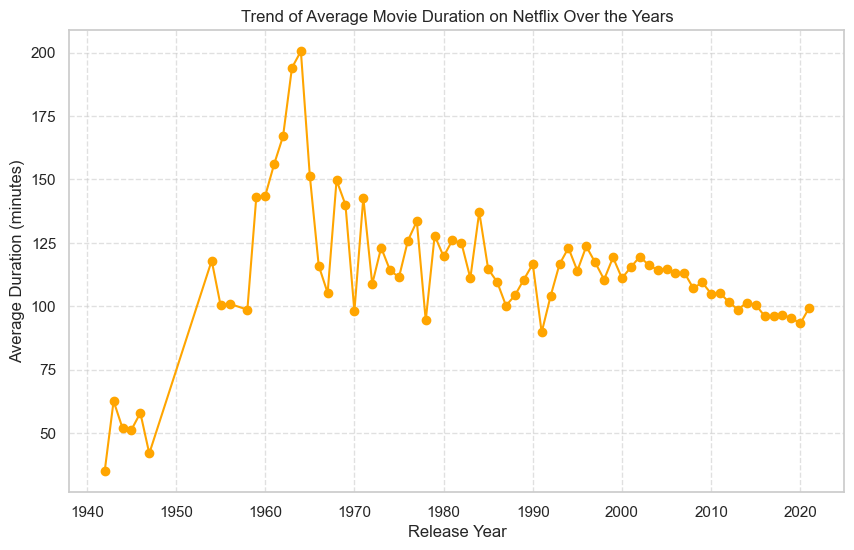

In [248]:
# Filter only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract duration in minutes (remove 'min' and convert to number)
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=False)
movies_df['duration'] = pd.to_numeric(movies_df['duration'], errors='coerce')

# Drop missing durations
movies_df = movies_df.dropna(subset=['duration', 'release_year'])

# Group by release year and calculate mean duration
duration_trend = (
    movies_df.groupby('release_year')['duration']
    .mean()
    .reset_index()
    .sort_values(by='release_year')
)

print(" Average Movie Duration Over the Years:")
print(duration_trend.tail(10))  # show last 10 years for readability

# Plot the trend
plt.figure(figsize=(10,6))
plt.plot(duration_trend['release_year'], duration_trend['duration'], marker='o', color='orange')
plt.title('Trend of Average Movie Duration on Netflix Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Finding:** Slight decrease 2012→2020, small rise 2021 (~95–100 min)
**Insight:** Runtime stabilizing; audience prefers concise storytelling.

### Question: 18
In which months does Netflix add the most content?
Useful for launch calendar planning and promotions.


 Number of Titles Added by Month:
month_added
January      537
February     385
March        541
April        549
May          445
June         495
July         576
August       529
September    520
October      546
November     496
December     549
Name: count, dtype: int64


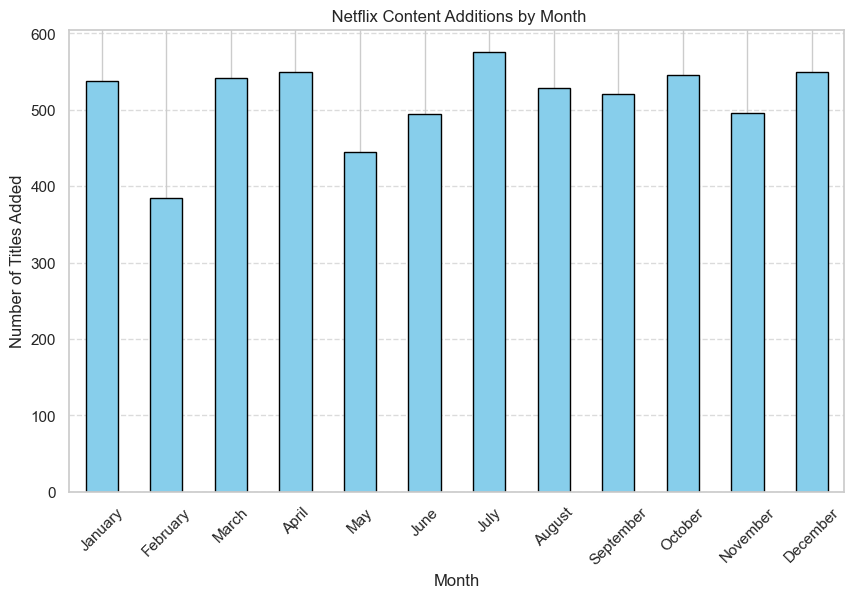

In [249]:
# Ensure date_added is in datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop missing dates
df = df.dropna(subset=['date_added'])

# Extract month name
df['month_added'] = df['date_added'].dt.month_name()

# Count how many titles were added each month
monthly_additions = (
    df['month_added']
    .value_counts()
    .reindex([
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ])
)

print(" Number of Titles Added by Month:")
print(monthly_additions)

# Plot
plt.figure(figsize=(10,6))
monthly_additions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(' Netflix Content Additions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


**Finding:** Peaks in July, April, and December
**Insight:** Netflix aligns releases with holidays and summer vacations — smart seasonal strategy.

### Question: 19
How does the genre distribution vary across different years?
Detects shifting content preferences and platform strategy.

 Genre Distribution by Year:
genre         action & adventure  anime features  anime series  \
release_year                                                     
2017                          89               6             1   
2018                          80               8             2   
2019                          42               6             0   
2020                          46               3             1   
2021                          36               5             2   

genre         british tv shows  children & family movies  classic & cult tv  \
release_year                                                                  
2017                         2                        52                  0   
2018                         4                        67                  0   
2019                         1                        65                  2   
2020                         4                        79                  1   
2021                         2    

<Figure size 1400x700 with 0 Axes>

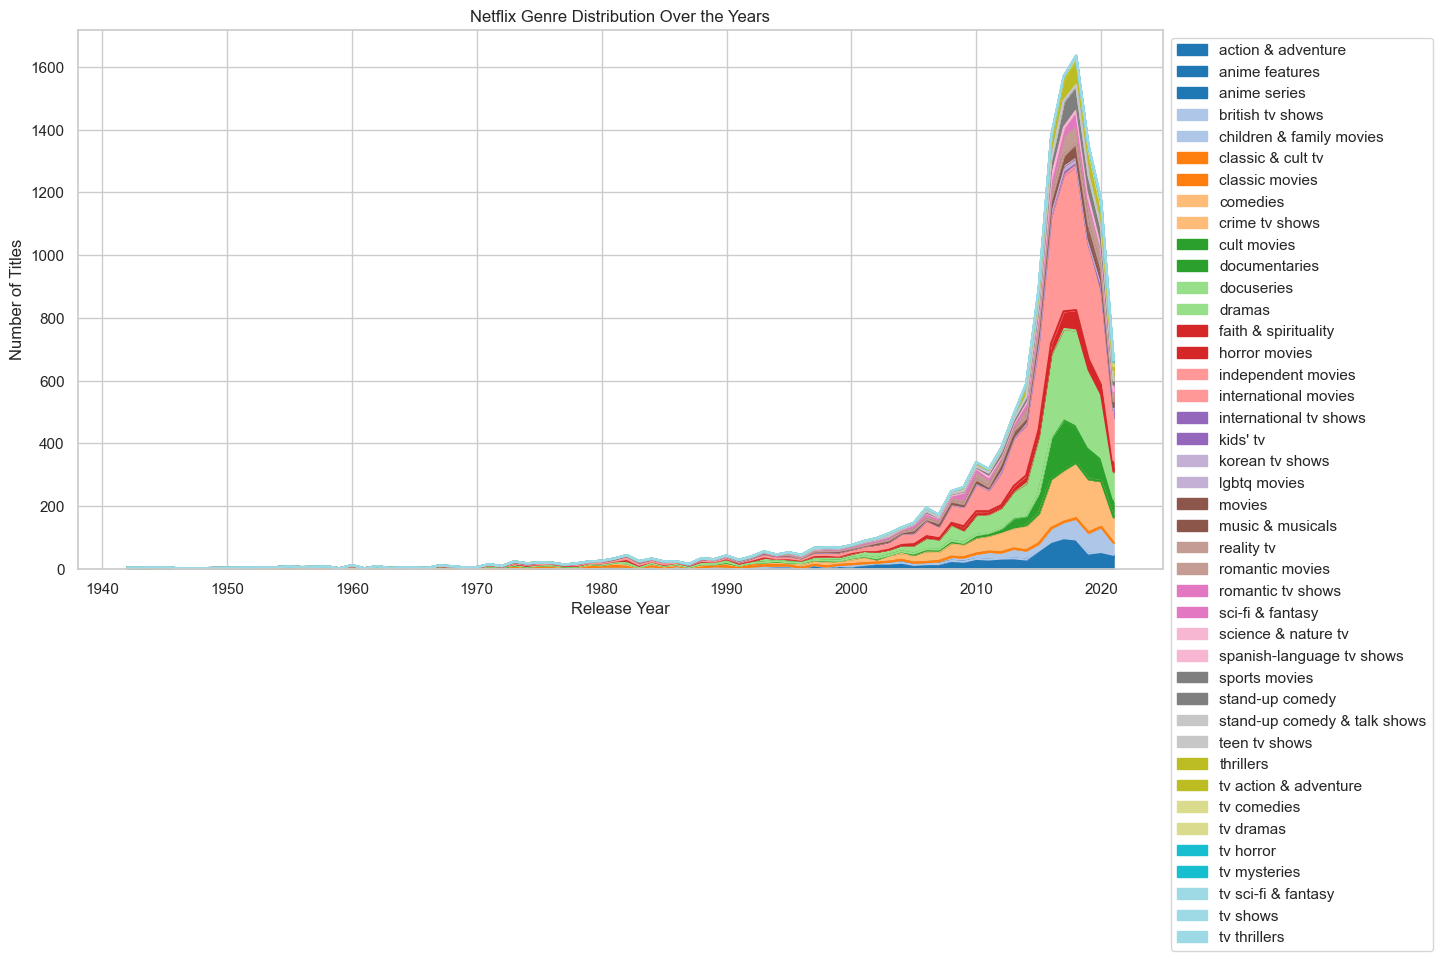

In [250]:
# Handle missing values in listed_in
df['listed_in'] = df['listed_in'].fillna('')

# Split and explode genres
df['genre'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()

# Group by release_year and genre, count occurrences
genre_year_counts = df_exploded.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

print(" Genre Distribution by Year:")
print(genre_year_counts.tail(5))  # show last 5 years for readability

plt.figure(figsize=(14,7))
genre_year_counts.plot.area(stacked=True, figsize=(14,7), cmap='tab20')
plt.title('Netflix Genre Distribution Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


#### Insights

| Metric                 | Meaning                                 | Actionable Insight                                                 |
| ---------------------- | --------------------------------------- | ------------------------------------------------------------------ |
| **Yearly Genre Count** | Number of titles per genre each year    | Identify which genres are trending or declining                    |
| **Stacked Area Plot**  | Visualizes genre proportions over years | Helps Netflix plan future acquisitions or original productions     |
| **Top Genres Trend**   | Focuses on most popular genres          | Can reveal strategic shifts, e.g., more documentaries in 2020–2022 |


### Question: 20
 Which countries produce the most content in each genre?
Supports international expansion and content licensing decisions.

In [251]:

# Handle missing values
df['listed_in'] = df['listed_in'].fillna('')
df['country'] = df['country'].fillna('Unknown')

# Split and explode genres
df['genre'] = df['listed_in'].str.split(', ')
df['country_list'] = df['country'].str.split(', ')

# Explode both genre and country columns
df_exploded = df.explode('genre').explode('country_list')

# Clean extra spaces
df_exploded['genre'] = df_exploded['genre'].str.strip()
df_exploded['country_list'] = df_exploded['country_list'].str.strip()

# Remove empty values
df_exploded = df_exploded[(df_exploded['genre'] != '') & (df_exploded['country_list'] != '')]

# Count content by country per genre
genre_country_counts = df_exploded.groupby(['genre', 'country_list']).size().reset_index(name='count')

# Find the top country per genre
top_country_per_genre = genre_country_counts.loc[genre_country_counts.groupby('genre')['count'].idxmax()]

print(" Top Producing Country for Each Genre:")
print(top_country_per_genre)


 Top Producing Country for Each Genre:
                             genre    country_list  count
57              action & adventure   United States    401
60                  anime features           Japan     61
63                    anime series           Japan      8
72                british tv shows  United Kingdom     21
120       children & family movies   United States    376
123              classic & cult tv  United Kingdom      2
145                 classic movies   United States     81
208                       comedies   United States    667
238                 crime tv shows   United States     22
255                    cult movies   United States     52
322                  documentaries   United States    482
347                     docuseries   United States     27
439                         dramas   United States    830
463           faith & spirituality   United States     42
510                  horror movies   United States    201
577             independent movie

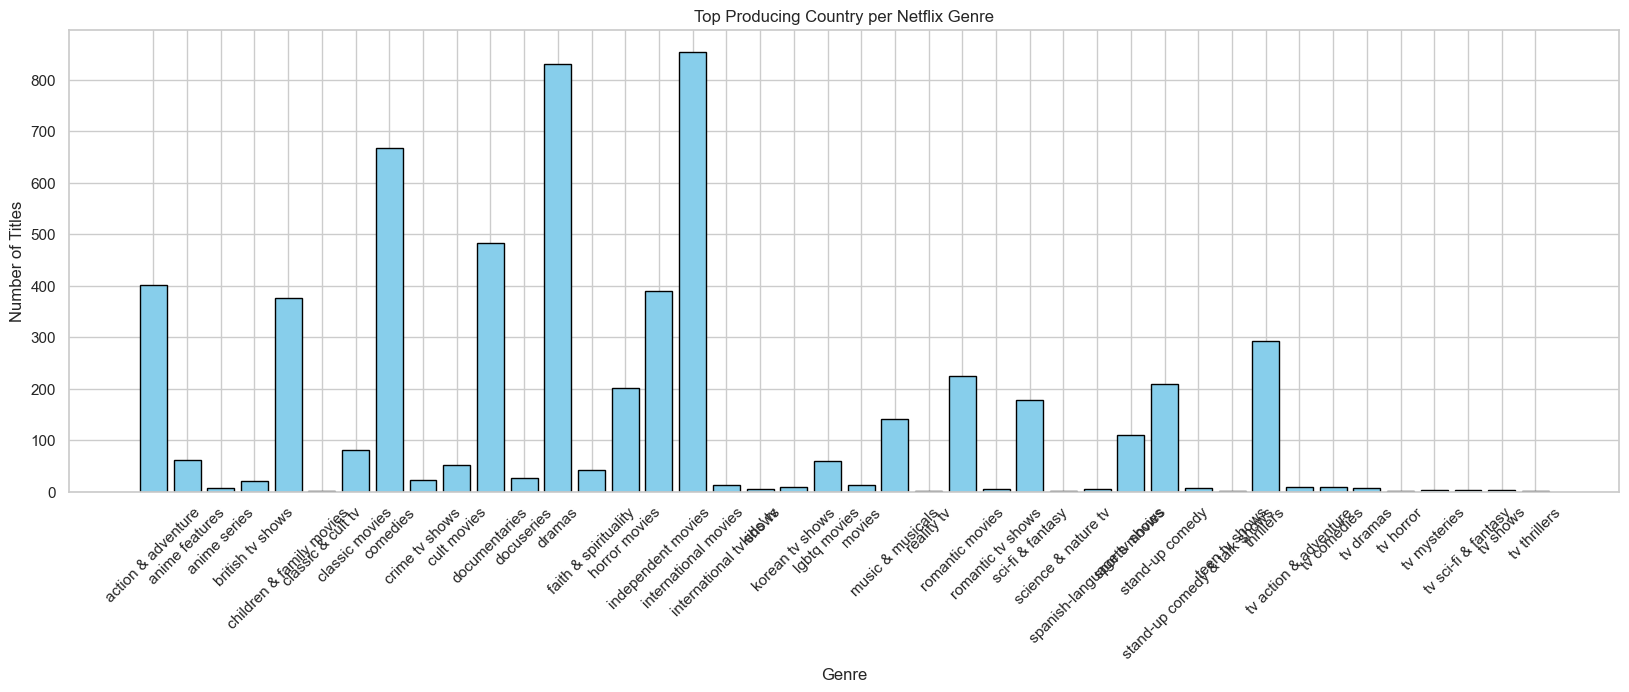

In [252]:
plt.figure(figsize=(20,6))
plt.bar(top_country_per_genre['genre'], top_country_per_genre['count'], color='skyblue', edgecolor='black')
plt.title('Top Producing Country per Netflix Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


#### Insights

| Metric                          | Meaning                                         | Actionable Insight                                           |
| ------------------------------- | ----------------------------------------------- | ------------------------------------------------------------ |
| **Top Country per Genre**       | Country producing the most titles in that genre | Guides Netflix on **licensing deals** and **regional focus** |
| **Count of Titles**             | Number of titles produced                       | Shows production strength and market dominance               |
| **Multi-country Contributions** | Some titles produced by multiple countries      | Helps explore **co-productions and collaborations**          |
